In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("https://raw.githubusercontent.com/HARSHA1352/OIBSIP/main/Unemployment_Rate_upto_11_2020.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [8]:
print(data.isnull().sum())

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64


In [9]:
group = data.groupby(['States'])['Estimated Unemployment Rate'].max()
group

States
Andhra Pradesh      20.51
Assam               11.06
Bihar               46.64
Chhattisgarh        14.23
Delhi               42.27
Goa                 21.25
Gujarat             18.71
Haryana             43.22
Himachal Pradesh    26.95
Jammu & Kashmir     21.08
Jharkhand           59.23
Karnataka           29.84
Kerala              17.88
Madhya Pradesh      21.98
Maharashtra         20.90
Meghalaya           10.03
Odisha              23.76
Puducherry          75.85
Punjab              28.33
Rajasthan           24.15
Sikkim              24.51
Tamil Nadu          49.83
Telangana           14.70
Tripura             41.23
Uttar Pradesh       21.54
Uttarakhand         22.26
West Bengal         17.41
Name: Estimated Unemployment Rate, dtype: float64

In [10]:
#Unemployment in covid-19

C:\Users\ujas2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


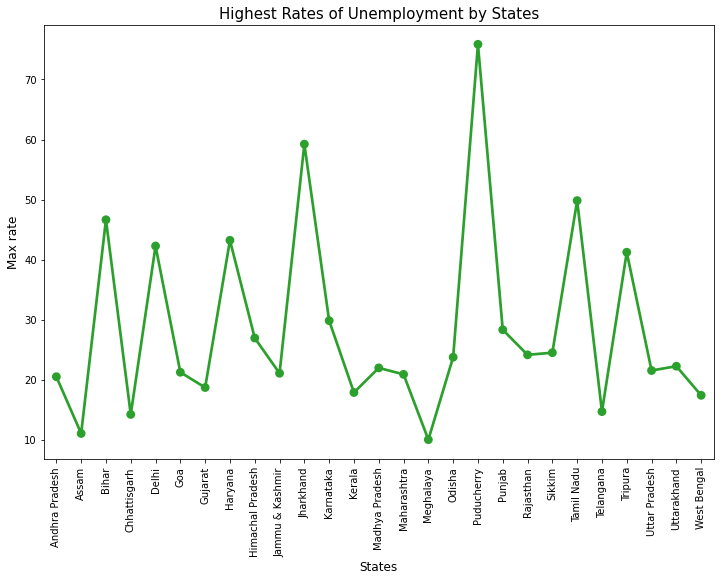

In [11]:
color = sns.color_palette()
group = data.groupby(["States"])["Estimated Unemployment Rate"].aggregate("max").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(group['States'].values, group['Estimated Unemployment Rate'].values, alpha=0.8, color=color[2])
plt.ylabel('Max rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Highest Rates of Unemployment by States", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

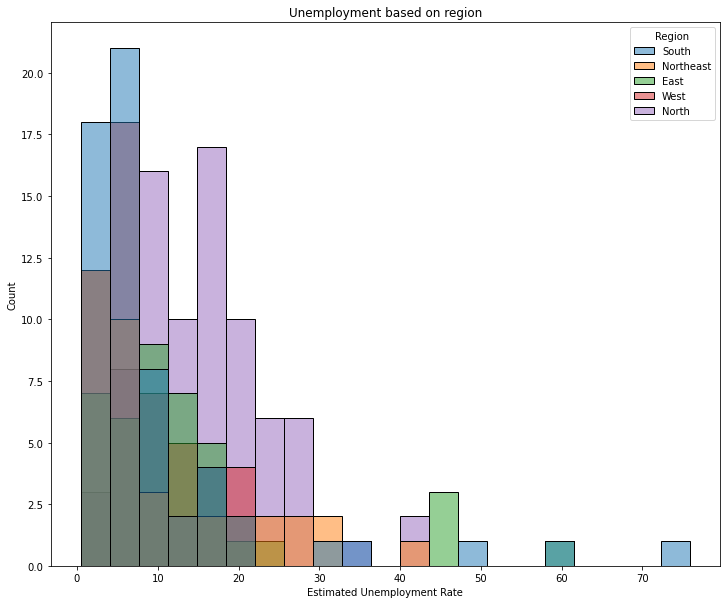

In [12]:
#Histogram visualization for unemployment based on regions
plt.figure(figsize=(12, 10))
plt.title("Unemployment based on region")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

In [13]:
#umemployment in india
df=pd.read_csv("https://raw.githubusercontent.com/HARSHA1352/OIBSIP/main/Unemployment%20in%20India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [14]:
df.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Area"]

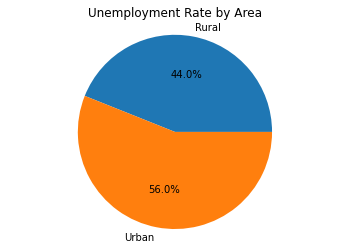

In [15]:
#Unemployment in India based on area
grouped_df = df.groupby('Area')['Estimated Unemployment Rate'].mean()

# Create a pie chart
plt.pie(grouped_df, labels=grouped_df.index, autopct='%1.1f%%')
plt.title('Unemployment Rate by Area')
plt.axis('equal')

# Display the chart
plt.show()

In [16]:
group = df.groupby(['States'])['Estimated Unemployment Rate'].max()
group

States
Andhra Pradesh      32.30
Assam               11.17
Bihar               58.77
Chandigarh          22.05
Chhattisgarh        27.07
Delhi               45.78
Goa                 25.20
Gujarat             25.94
Haryana             46.89
Himachal Pradesh    50.00
Jammu & Kashmir     24.06
Jharkhand           70.17
Karnataka           33.17
Kerala              30.28
Madhya Pradesh      40.49
Maharashtra         25.28
Meghalaya           17.39
Odisha              24.48
Puducherry          76.74
Punjab              40.59
Rajasthan           35.53
Sikkim              20.45
Tamil Nadu          53.19
Telangana           36.57
Tripura             43.64
Uttar Pradesh       32.06
Uttarakhand         17.36
West Bengal         18.43
Name: Estimated Unemployment Rate, dtype: float64

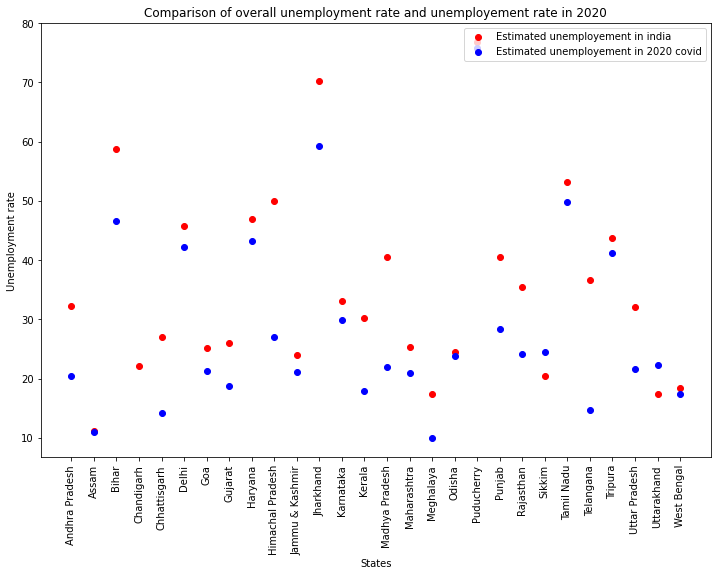

In [19]:
group =data.groupby(["States"])["Estimated Unemployment Rate"].aggregate("max").reset_index()#unemployment in 2020
group1=df.groupby(["States"])["Estimated Unemployment Rate"].aggregate("max").reset_index()#overall unemployement
plt.figure(figsize=(12,8))
plt.scatter(group1['States'].values,group1['Estimated Unemployment Rate'].values,color='red',label="Estimated unemployement in india")#red is estimated unemployement rate in india
plt.scatter(group['States'].values,group['Estimated Unemployment Rate'].values,color='blue',label="Estimated unemployement in 2020 covid")#blue is the estimated unemployment rate in 2020
plt.title('Comparison of overall unemployment rate and unemployement rate in 2020')
plt.xlabel('States')
plt.ylabel('Unemployment rate')
plt.xticks(rotation='vertical')
plt.legend(loc="upper right")
plt.show()